# Classification using Decision trees, a basic tutorial

In [1]:
#Importing necessary modules/libraries
#for data import and processing
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearhttp://localhost:8891/notebooks/DecisionTrees%20and%20RandomForest.ipynb#n.preprocessing import LabelEncoder,StandardScaler #for standardizing data
                                   
le=LabelEncoder() # Converting categorical to Numeric

from sklearn.model_selection import train_test_split #splitting data into test and train

from sklearn.tree import DecisionTreeClassifier #classifier
from sklearn.ensemble import  RandomForestClassifier   #classifier                     
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score # Quality check of the qualifier

# for plotting
import matplotlib.pyplot as plt 
plt.rc("font", size = 14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
%matplotlib inline
seed = 40

# Import data

In [2]:
#import the data
df = pd.read_csv('datascience/import_data/bank-additional-full.csv', delimiter=';' )
#drop the undesired column
data = df.drop(["duration","emp.var.rate","euribor3m"], axis =1)# axis shows it is a column and row

#Convert categorical to numeric using le transform
for col in data.columns.values:
     if data[col].dtypes=="object":
        le.fit(data[col].values)
        data[col]=le.transform(data[col])



# Divide into test and train datasets

In [3]:
#test_train split
def test_train(dataset,seed):
    #Number of columns
    n= len(dataset.columns)
    array = dataset.values
    X = array[:,0:n-1]
    y = array[:,n-1]
    validation_size = 0.20
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
    return  X_train, X_test, y_train, y_test

#run the function
X_train, X_test, y_train, y_test = test_train(data,seed)




# Decision tree

In [4]:
dtree = DecisionTreeClassifier(criterion='gini',
                               splitter= 'best', #best or random
                               max_depth=None, 
                               min_samples_split=2, 
                               min_samples_leaf=1,
                               min_weight_fraction_leaf=0.0, 
                               max_features=None, #If int, then consider max_features features at each split.
                                                #If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
                                                #If “auto”, then max_features=sqrt(n_features).
                                                #If “sqrt”, then max_features=sqrt(n_features).
                                                #If “log2”, then max_features=log2(n_features).
                                                #If None, then max_features=n_features.
                               random_state=None, 
                               max_leaf_nodes=None,
                               min_impurity_decrease=0.0, #A node will be split if this split induces a decrease 
                                                          #of the impurity greater than or equal to this value.
                               min_impurity_split=None, 
                               class_weight=None, #dict, list of dicts, “balanced” or None,
                               presort=False)



In [5]:
#Fit the data to the tree
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
#let's 
predictions = dtree.predict(X_test)


# Quality Check

In [7]:
#classification report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91      7250
        1.0       0.31      0.31      0.31       988

avg / total       0.83      0.83      0.83      8238



In [8]:
#Confusion matrix
cm=confusion_matrix(y_test,predictions)
print(cm)
#Accuracy
ac= accuracy_score(y_test,predictions)
print("Accuracy is %.2f%%"% (ac*100))

[[6565  685]
 [ 684  304]]
Accuracy is 83.38%


# Result interpretation

# Random Forest

let's do a model fitting and prediction using Random forest

In [9]:
rfc= RandomForestClassifier(n_estimators=100,
                            criterion="gini",
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features="auto", 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            bootstrap=True, 
                            oob_score=False, 
                            n_jobs=3, 
                            random_state=None, 
                            verbose=1, 
                            warm_start=False, 
                            class_weight=None)

In [10]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


# Quality check

In [11]:
f1=f1_score(y_test,predictions, average="weighted") # weigted F1_score take into account the class imbalance
print("The F1 score is %.2f%%"%(f1*100))


The F1 score is 83.39%


# Simulation for number of trees in forest

[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  14 out of  14 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done  14 out of  14 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:    0.0s finished


F1 score is 83.39%


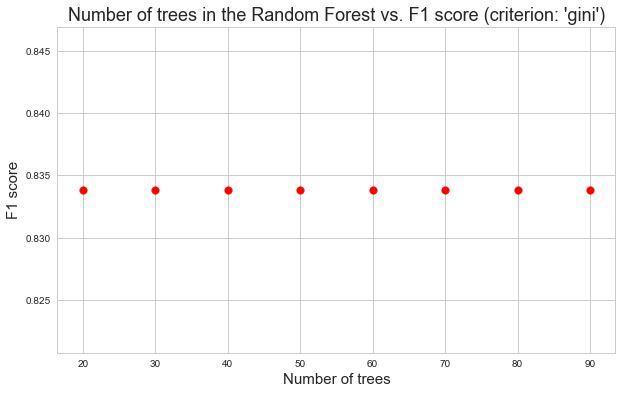

In [12]:
nSim = 10 # number of simulation parameters
f1_sim =[]
n_trees =[]
for i in range(1,nSim):
    rfc= RandomForestClassifier(n_estimators= i*2,
                            criterion="gini",
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features="auto", 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            bootstrap=True, 
                            oob_score=False, 
                            n_jobs=3, 
                            random_state=None, 
                            verbose=1, 
                            warm_start=False, 
                            class_weight=None)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    f1= f1_score(y_test,predictions, average="weighted") 
    f1_sim.append(f1)
    n_trees.append(i*10)
    print("F1 score is %.2f%%"%(f1*100))
    


plt.figure(figsize=(10,6))
plt.scatter(x=n_trees[1:nSim],y=f1_sim[1:nSim],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. F1 score (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("F1 score", fontsize=15)



# # Simulation using Entropy as split criteria

[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Done  14 out of  14 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed:    0.0s finished


F1 score is 83.39%


[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:    0.0s finished


F1 score is 83.39%


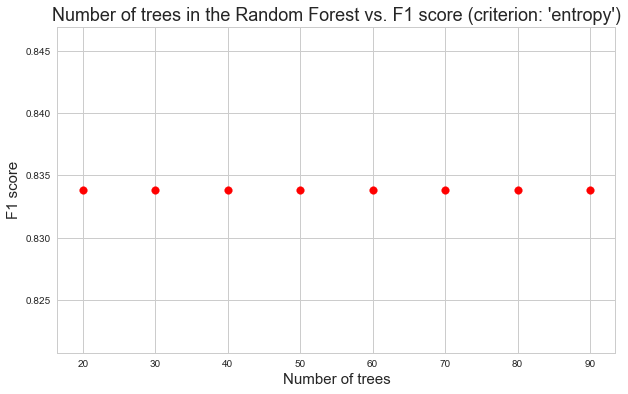

In [13]:
nSim = 10 # number of simulation parameters
f1_sim =[]
n_trees =[]
for i in range(1,nSim):
    rfc= RandomForestClassifier(n_estimators= i*2,
                            criterion="entropy",
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features="auto", 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            bootstrap=True, 
                            oob_score=False, 
                            n_jobs=3, 
                            random_state=None, 
                            verbose=1, 
                            warm_start=False, 
                            class_weight=None)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    f1= f1_score(y_test,predictions, average="weighted") 
    f1_sim.append(f1)
    n_trees.append(i*10)
    print("F1 score is %.2f%%"%(f1*100))
    


plt.figure(figsize=(10,6))
plt.scatter(x=n_trees[1:nSim],y=f1_sim[1:nSim],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. F1 score (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("F1 score", fontsize=15)



Looks like number of trees and changing the split criteria did not change the results. What did change the results is the 
seed. Try changing the seed and you will seee a different result